# Análise de Dados da Vacinação no Recife

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('vacinados.csv', sep= ';', encoding= 'ISO-8859-1')

In [3]:
raw_data.head()

,cpf,nome,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.457.304-**,JOSÃ BARBOSA DINIZ,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210114,2,03/04/2021,DRIVE THRU - BIG BOMPREÃO - BOA VIAGEM
1,***.457.304-**,JOSÃ BARBOSA DINIZ,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210052A,1,13/03/2021,DRIVE THRU GERALDÃO
2,***.556.154-**,LUIZ CAMILO DE SANTANA,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210093,2,01/04/2021,DRIVE THRU PARQUE DA MACAXEIRA
3,***.556.154-**,LUIZ CAMILO DE SANTANA,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,1,04/03/2021,DRIVE THRU PARQUE DA MACAXEIRA
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2,04/03/2021,CENTRO DE VACINAÃÃO PARQUE DE EXPOSIÃÃO


# Tratamento dos Dados

### Filtrando os Dados

In [4]:
raw_data.columns.values

array(['cpf', 'nome', 'grupo', 'vacina', 'lote', 'dose', 'data_vacinacao',
       'local_vacinacao'], dtype=object)

In [5]:
selectedColumns = ['cpf', 'grupo', 'vacina', 'dose', 'data_vacinacao']

In [6]:
# Criando um dataframe apenas com as colunas selecionadas
data = raw_data.filter(items= selectedColumns)

In [7]:
data.head()

,cpf,grupo,vacina,dose,data_vacinacao
0,***.457.304-**,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),2,03/04/2021
1,***.457.304-**,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),1,13/03/2021
2,***.556.154-**,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),2,01/04/2021
3,***.556.154-**,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),1,04/03/2021
4,***.886.964-**,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),2,04/03/2021


### Renomeando Vacinas

In [8]:
data['vacina'].unique()

array(['1 - CORONAVAC - SINOVAC (BUTANTAN)',
       '2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)',
       '3 - COMIRNATY (PFIZER)',
       ' CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)'], dtype=object)

In [9]:
data['vacina'] = data['vacina'].replace(['1 - CORONAVAC - SINOVAC (BUTANTAN)'], 'CORONAVAC')

In [10]:
data['vacina'] = data['vacina'].replace(['2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)', ' CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)'], 'CHADOX1NCOV-19')

In [11]:
data['vacina'] = data['vacina'].replace(['3 - COMIRNATY (PFIZER)'], 'COMIRNATY')

In [12]:
data['vacina'].unique()

array(['CORONAVAC', 'CHADOX1NCOV-19', 'COMIRNATY'], dtype=object)

In [13]:
data['vacina'].unique()

array(['CORONAVAC', 'CHADOX1NCOV-19', 'COMIRNATY'], dtype=object)

### Renomeando os Grupos

In [14]:
data['grupo'].unique()

array(['TRABALHADORES DA SAÃ\x9aDE', 'IDOSOS', 'OUTRAS PRIORIDADES',
       'PESSOAS COM COMORBIDADES', 'TRABALHADORES DA EDUCAÃ\x87Ã\x83O',
       'GRÃ\x81VIDAS E PUÃ\x89RPERAS'], dtype=object)

In [15]:
data['grupo'] = data['grupo'].replace(['PESSOAS COM COMORBIDADES'], 'COMORBIDADES')

In [16]:
data['grupo'] = data['grupo'].replace(['TRABALHADORES DA SAÃDE'], 'SAÚDE')

In [17]:
data['grupo'] = data['grupo'].replace(['OUTRAS PRIORIDADES'], 'OUTROS')

In [18]:
data['grupo'] = data['grupo'].replace(['TRABALHADORES DA EDUCAÃ\x87Ã\x83O'], 'EDUCAÇÃO')

In [19]:
data['grupo'] = data['grupo'].replace(['GRÃ\x81VIDAS E PUÃ\x89RPERAS'], 'GRÁVIDAS E PUÉRPERAS')

In [20]:
data['grupo'].unique()

array(['SAÚDE', 'IDOSOS', 'OUTROS', 'COMORBIDADES', 'EDUCAÇÃO',
       'GRÁVIDAS E PUÉRPERAS'], dtype=object)

In [21]:
data.head()

,cpf,grupo,vacina,dose,data_vacinacao
0,***.457.304-**,SAÚDE,CORONAVAC,2,03/04/2021
1,***.457.304-**,SAÚDE,CORONAVAC,1,13/03/2021
2,***.556.154-**,IDOSOS,CORONAVAC,2,01/04/2021
3,***.556.154-**,IDOSOS,CORONAVAC,1,04/03/2021
4,***.886.964-**,SAÚDE,CORONAVAC,2,04/03/2021


# Analisando Queries com Histogramas
##### *A histogram is an approximate representation of the distribution of numerical data.*

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Criando um dataframe com a proporção da classe dose
doses_proportion = data['dose'].value_counts(normalize= True).reset_index()
doses_proportion.columns = ['dose', 'proporção']
doses_proportion

,dose,proporção
0,1,0.657001
1,2,0.342999


### Poucas pessoas tomaram a segunda dose, o que indica que a pandemia ainda vai durar um pouco... :(

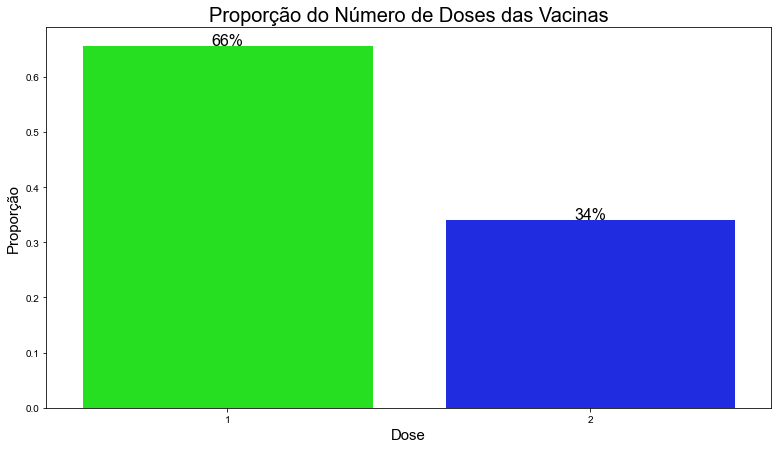

In [24]:
# Criando figura e eixos
fig, ax = plt.subplots(figsize=(13, 7)) 

# Mudando o estilo de fundo
sns.set_style('darkgrid')

# Criando uma palheta de 2 cores
sns.set_palette(sns.color_palette('hsv', 2))

# Criando o gráfico 
sns.barplot(x= 'dose', y= 'proporção', data= doses_proportion, ax= ax)

# Adicionando os títulos e mudando o tamanho das fontes
plt.title('Proporção do Número de Doses das Vacinas', fontsize=20)
plt.xlabel('Dose', fontsize=15)
plt.ylabel('Proporção', fontsize=15)

# Adicionando os valores acima da barra
for index, row in doses_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.0%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

# Plotando o gráfico
plt.show()

In [25]:
# Criando um dataframe com a proporção da classe vacina
vaccines_proportion = data['vacina'].value_counts(normalize= True).reset_index()
vaccines_proportion.columns = ['vacina', 'proporção']
vaccines_proportion

,vacina,proporção
0,CORONAVAC,0.704495
1,CHADOX1NCOV-19,0.288157
2,COMIRNATY,0.007348


### A alta adesão a vacina brasileira ressalta o poder da pesquisa brasileira.

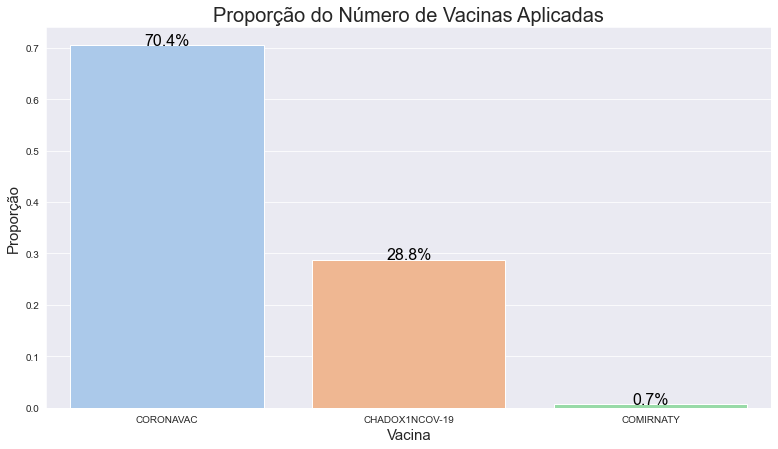

In [26]:
fig, ax = plt.subplots(figsize=(13, 7)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('pastel', 3))

sns.barplot(x= 'vacina', y= 'proporção', data= vaccines_proportion, ax= ax)

plt.title('Proporção do Número de Vacinas Aplicadas', fontsize= 20)
plt.xlabel('Vacina', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

for index, row in vaccines_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.1%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

In [27]:
# Criando um dataframe com a proporção da classe grupo
groups_proportion = data['grupo'].value_counts(normalize= True).reset_index()
groups_proportion.columns = ['grupo', 'proporção']
groups_proportion

,grupo,proporção
0,IDOSOS,0.717877
1,SAÚDE,0.244215
2,COMORBIDADES,0.014709
3,EDUCAÇÃO,0.014155
4,GRÁVIDAS E PUÉRPERAS,0.007298
5,OUTROS,0.001746


### Devido a baixa taxa de vacinação por falta de vacinas, os idosos seguem sendo a prioridade.

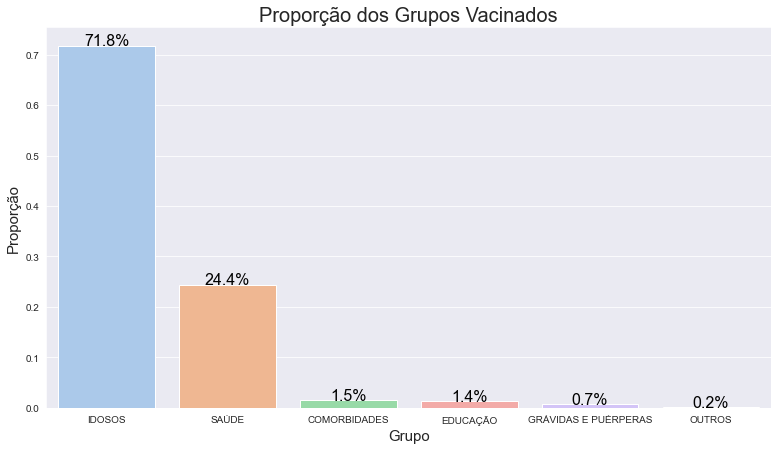

In [28]:
fig, ax = plt.subplots(figsize=(13, 7)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('pastel', 6))

sns.barplot(x= 'grupo', y= 'proporção', data= groups_proportion, ax= ax)

plt.title('Proporção dos Grupos Vacinados', fontsize= 20)
plt.xlabel('Grupo', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

for index, row in groups_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.1%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()